In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
import glob
import numpy as np

In [2]:
dataframes = []

column_names = ["coverage", "temp", "step", "stemp", "Temp", "PotEng", "swap1", "swap2"]

files = [file for file in glob.glob("extracted/*")]

for file in files:
    df = pd.read_csv(file, names=column_names)
    dataframes.append(df)

results = pd.DataFrame(columns=["coverage", "temp", "PotEng_std", "PotEng_mean"])

for i, file in enumerate(files):
    df = pd.read_csv(file, names=column_names)
    df["PotEng"] *= 0.0433634   # kcal/mol to eV
    results.loc[i] = [df.coverage[0], df.temp[0], df[-500:].PotEng.std(), df[-500:].PotEng.mean()]

half = results[results.coverage == "half"].sort_values("temp").reset_index(drop=True)
full = results[results.coverage == "full"].sort_values("temp").reset_index(drop=True)

n = len(full) 
std_error = full["PotEng_std"] / np.sqrt(n)


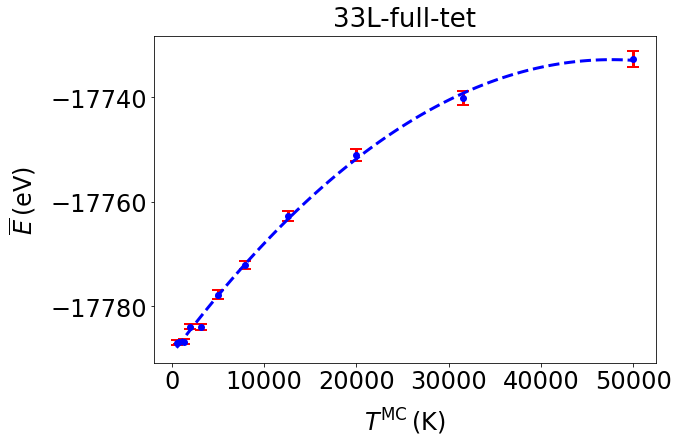

In [4]:

font = {"size": 24}
plt.rc("font", **font)
plt.rc("legend",fontsize=16)
plt.rcParams["savefig.facecolor"]="white"

x = full["temp"].values  # Independent variable
y = full["PotEng_mean"].values  # Dependent variable 

# Polynomial fitting 
coefficients = np.polyfit(x, y, 2)

# Create a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)

plt.figure(figsize=(9, 6))
plt.errorbar(x, y, yerr=std_error, fmt="o", color="b", ecolor="r", 
             capsize=6, markersize=5, elinewidth=3, markeredgewidth=2)
plt.plot(x_fit, y_fit, "b--", linewidth=3)

plt.xlabel(r"$T^\mathrm{MC}\,\mathrm{(K)}$", fontsize=24, labelpad=12)
plt.ylabel(r"$\overline{E}\,\mathrm{(eV)}$", fontsize=24, labelpad=12)
plt.title("33L-full-tet", pad=10, fontsize=26)

plt.savefig("entropy.png", dpi=300, bbox_inches="tight")
plt.savefig("entropy.pdf",format="pdf", bbox_inches = "tight")

plt.show()